# 精度指標

## 混合行列

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

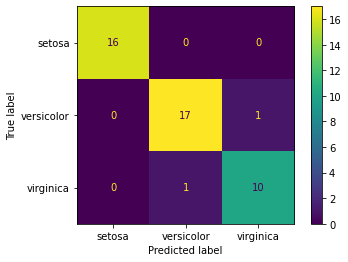

In [14]:
#データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 混合行列
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Accuracy

In [23]:
from sklearn.metrics import accuracy_score

# サンプル
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

accuracy_score(y_true, y_pred)

0.5

## Precision

In [24]:
from sklearn.metrics import precision_score


# サンプル
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

precision_score(y_true, y_pred)

0.6

## Recall

In [25]:
from sklearn.metrics import recall_score

# サンプル
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

recall_score(y_true, y_pred)

0.6

## Specificity

In [26]:
import numpy as np

y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

## 多クラス分類の評価　macro平均/micro平均

In [82]:
from sklearn.metrics import precision_score

#データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
# average-None
print(precision_score(y_test, y_pred, average=None))

# average-Macro
print(precision_score(y_test, y_pred, average='macro'))

# average-Micro
print(precision_score(y_test, y_pred, average='micro'))

# accuracy
print(accuracy_score(y_test, y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


## Precision-Recall Curve

In [43]:
from sklearn.metrics import precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/heart_preprocessed.csv')

# データ準備
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#modelの構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [44]:
# thresholdsはしきい値
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

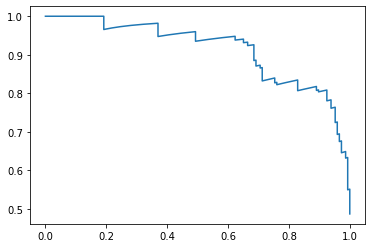

In [46]:
plt.plot(recall, precision)

 ## F値

In [51]:
from sklearn.metrics import f1_score, recall_score, precision_score

y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

f1_score(y_true, y_pred)

0.6

In [53]:
# 調和平均
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.6

## F値の推移

In [56]:
# それぞれの行のprecision, recallをタプルで返す
# list(zip(precision, recall))

f1_scores = [hmean([p, r])for p, r in zip(precision, recall)]

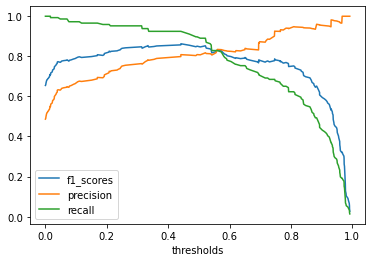

In [62]:
# 0,1があるためthreshholdsだけ要素が1多い
plt.plot(thresholds, f1_scores[:-1], label='f1_scores')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('thresholds')
plt.legend()

In [64]:
np.argmax(f1_scores)
thresholds[np.argmax(f1_scores)]

0.4416458143760564

 ## ROC

Text(0, 0.5, 'sensitivity(TPR)')

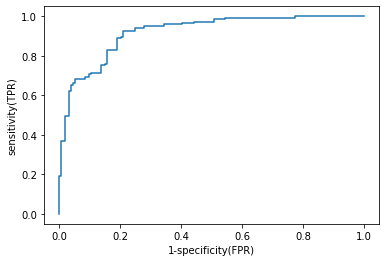

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')

## AUC

In [73]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.919542785981142

## 多クラス分類のROC

In [84]:
## データの準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

## macro平均

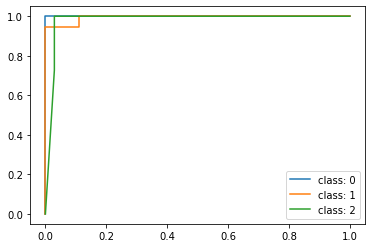

In [101]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

y_test_one_hot = label_binarize(y_test, classes=model.classes_)
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

## それぞれのクラスのROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
    plt.legend()

In [108]:
# xのリスト
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
interped_tpr = {}
mean_tpr = np.zeros_like(all_fpr)

# 線形補間
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i],tpr[i])
mean_tpr = mean_tpr / n_classes

In [110]:
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

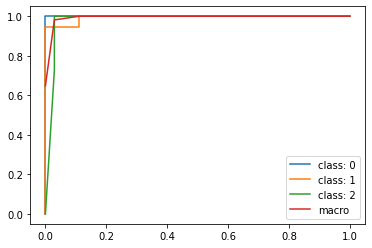

In [111]:
## それぞれのクラスのROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()

## micro

In [116]:

fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(),y_pred_proba.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

In [117]:
fpr

{0: array([0., 0., 1.]),
 1: array([0.        , 0.        , 0.11111111, 0.11111111, 0.74074074,
        1.        ]),
 2: array([0.        , 0.02941176, 0.02941176, 0.52941176, 1.        ]),
 'macro': array([0.        , 0.02941176, 0.11111111, 0.52941176, 0.74074074,
        1.        ]),
 'micro': array([0.        , 0.01111111, 0.01111111, 0.02222222, 0.02222222,
        0.07777778, 0.07777778, 0.42222222, 1.        ])}

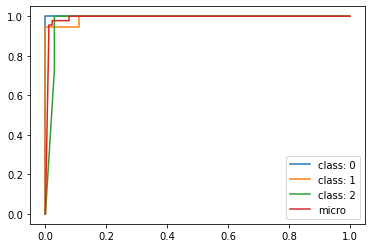

In [118]:
## それぞれのクラスのROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.legend()